In [1]:
import pandas as pd

In [2]:
# import the csv file
df=pd.read_csv('cardio.csv')

In [3]:
df.head() # check whether there's header in the dataframe

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


This is a dataset recording the patients' physical measured data for Cardiovascular Disease Detection.
Per the instruction and data dictionary of the Cardiovascular Disease Detection dataset, there're 11 features as below,
1.	Age | Objective Feature | age | int (days)
2.	Height | Objective Feature | height | int (cm) |
3.	Weight | Objective Feature | weight | float (kg) |
4.	Gender | Objective Feature | gender | categorical code |
5.	Systolic blood pressure | Examination Feature | ap_hi | int |
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.	Smoking | Subjective Feature | smoke | binary |
10.	Alcohol intake | Subjective Feature | alco | binary |
11.	Physical activity | Subjective Feature | active | binary |

The last column "cardio" is target dependent variable which the models would be built to estimate the "cardio" classification.
The data source and detailed description of the dataset can be found at the link below
https://www.kaggle.com/datasets/bhadaneeraj/cardio-vascular-disease-detection

# 1. Cleanup the dataset and make description on the dataset

In [3]:
#checking missing data
for col_name in df.columns:
    print('Column ', col_name, ' has: ', df[col_name].isna().sum(), ' missing values.')

Column  id  has:  0  missing values.
Column  age  has:  0  missing values.
Column  gender  has:  0  missing values.
Column  height  has:  0  missing values.
Column  weight  has:  0  missing values.
Column  ap_hi  has:  0  missing values.
Column  ap_lo  has:  0  missing values.
Column  cholesterol  has:  0  missing values.
Column  gluc  has:  0  missing values.
Column  smoke  has:  0  missing values.
Column  alco  has:  0  missing values.
Column  active  has:  0  missing values.
Column  cardio  has:  0  missing values.


In [4]:
num_vars=['age','height','weight','ap_hi','ap_lo']
cat3_vars=['gender','cholesterol','gluc']
bin_vars=['smoke','alco','active']
target='cardio'

In [5]:
#Explore 3 categories data, no data out of range, but some data distributed in bias:
for col_name in cat3_vars:
    print(df[col_name].value_counts())

1    45079
2    24222
Name: gender, dtype: int64
1    51868
2     9446
3     7987
Name: cholesterol, dtype: int64
1    58885
3     5277
2     5139
Name: gluc, dtype: int64


In [6]:
#Explore binary categories data, no data out of range, but some data distributed in bias:
for col_name in bin_vars:
    print(df[col_name].value_counts())

0    63199
1     6102
Name: smoke, dtype: int64
0    65567
1     3734
Name: alco, dtype: int64
1    55717
0    13584
Name: active, dtype: int64


In [7]:
# Explore target variable, as the result, very perfect distributed in both classification
print(df[target].value_counts())

0    34679
1    34622
Name: cardio, dtype: int64


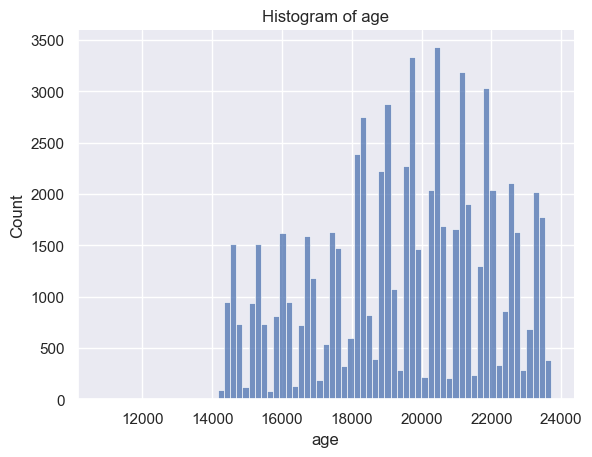

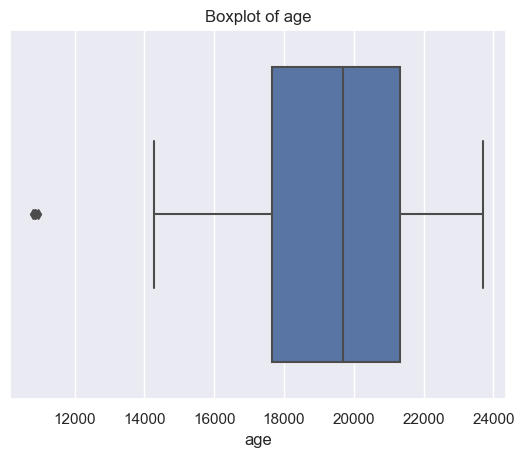

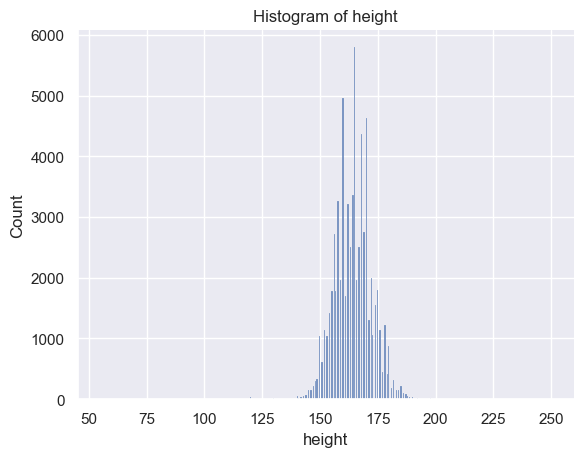

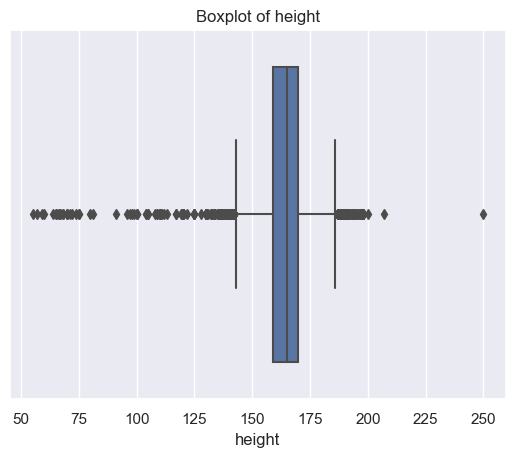

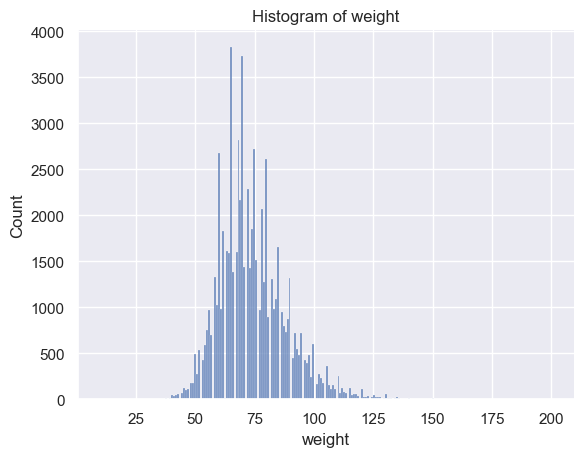

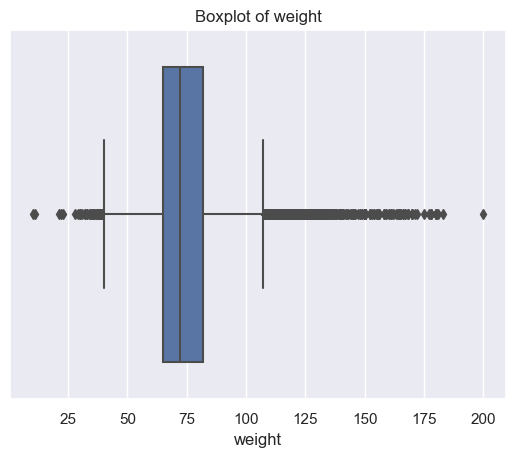

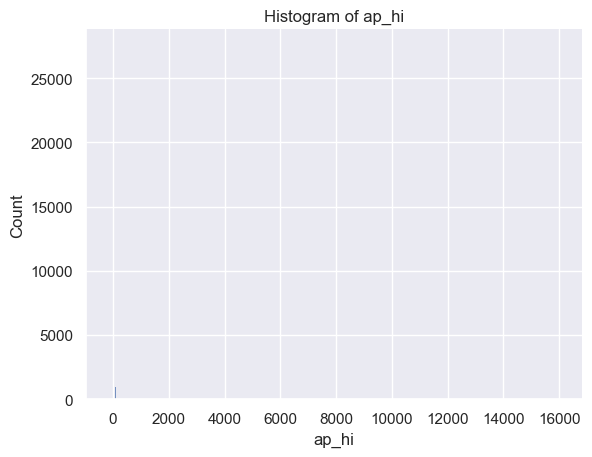

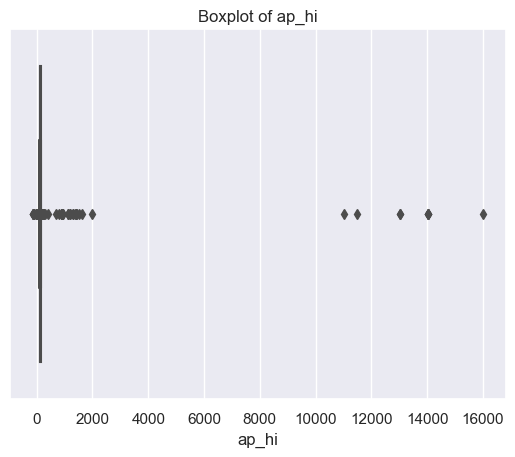

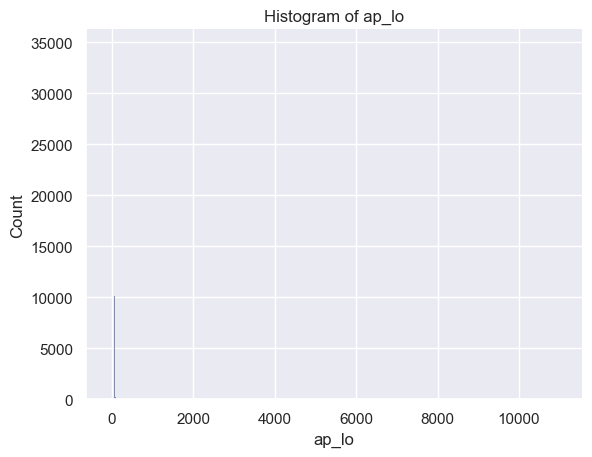

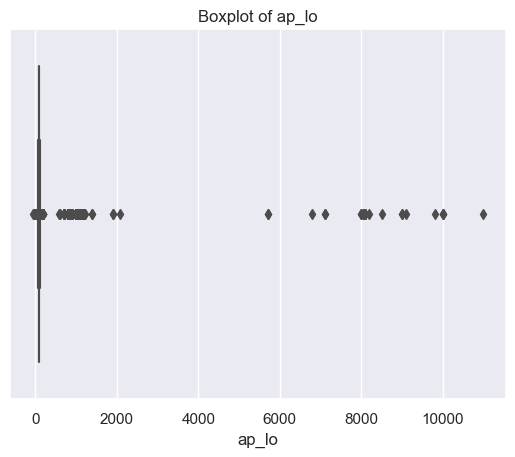

In [9]:
# Check numberic data distribution
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
for col_name in num_vars:
    sns.set_theme(style="darkgrid")
    f,ax=plt.subplots()
    sns.despine(f)
    sns.histplot(data=df,x=df[col_name]).set(title='Histogram of {}'.format(col_name))
    plt.show()
    sns.set_theme(style="darkgrid")
    sns.boxplot(data=df,x=df[col_name]).set(title='Boxplot of {}'.format(col_name))
    plt.show()

From the histograms and boxplots, the data on age (days), height(cm), weight(kg) are in reasonable human range. At the same time, some data in "ap_hi" and "ap_low" are unreasonable.

According to the professional medical article and research, the for "ap_hi" column, the highest pressure for systolic blood pressure recorded in an individual was 370/360. 
(Cited from: "Influence of breathing technique on arterial blood pressure during heavy weight lifting" https://pubmed.ncbi.nlm.nih.gov/7741618/#:~:text=The%20highest%20pressure%20recorded%20in,maximal%20lifting%20with%20slow%20exhalation.) 

Therefore, the reasonable blood pressure range and range for columns "ap_hi", "ap_lo" should be between 0-400, and the "ap_hi" should be higher than "ap_lp" at the same time. 
All blood pressure data out of this range should be cleaned up after further investigation.

In [8]:
#How many data are out of range in "ap_hi"?
outrange_hi=[]
for pressure in df['ap_hi']:
    if pressure<0 or pressure>400:
        outrange_hi.append(pressure)
print('There are',len(outrange_hi), """data out of range in 'ap_hi'""")
print(outrange_hi)

There are 46 data out of range in 'ap_hi'
[902, 906, -100, 909, 11500, 1420, 701, 1500, -115, 907, -100, 906, -140, -120, 14020, 14020, 1400, 1620, 907, 907, -150, 1130, 401, 16020, 1202, 806, 906, 906, 1400, 1420, 1300, -120, 14020, 14020, 1400, 1409, 11020, 960, 13010, 13010, 1300, 1110, 1205, 906, 906, 2000]


I will consider to remove these rows, because there're only observations having out of range top blood pressure.

In [9]:
#Remove out of range data in "ap_hi"
df.drop(df[df.ap_hi<0].index,inplace=True)
df.drop(df[df.ap_hi>400].index,inplace=True)

In [10]:
#Check how many observations are ap_hi lower than or ap_lo?
df.query('ap_hi<ap_lo')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
20,1015,23407,2,170,74.0,140,1000,1,1,0,0,1,1
182,1229,17405,2,170,84.0,150,1100,1,1,1,0,0,1
228,1294,21867,2,175,70.0,14,90,3,1,0,0,1,1
280,1360,18225,1,172,65.0,11,80,1,3,0,0,1,0
301,1389,21043,2,168,82.0,160,1000,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69072,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1
69173,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1
69179,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1
69186,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0


From the table above, it seems like the reason why the situation that top blood pressure higher than bottom blood pressure is due to unreasonable bottomw blood pressure. The bottom pressure data needs to be further investigated. 

In [11]:
# Check how many abnormal bottom blood presure we have before removing the observations "ap_hi" lower than "ap_lo"
outrange_lo=[]
for pressure in df['ap_lo']:
    if pressure<0 or pressure>400:
        outrange_lo.append(pressure)
print('There are',len(outrange_lo), """data out of range in 'ap_lo'""")

There are 944 data out of range in 'ap_lo'


In [12]:
# Remove the observations "ap_hi" lower than "ap_lo"
df.drop(df[df.ap_hi<df.ap_lo].index,inplace=True)

In [13]:
# Check how many abnormal bottom blood presure we have after removing the observations "ap_hi" lower than "ap_lo"
outrange_lo=[]
for pressure in df['ap_lo']:
    if pressure<0 or pressure>400:
        outrange_lo.append(pressure)
print('There are',len(outrange_lo), """data out of range in 'ap_lo'""")
print(outrange_lo)

There are 1 data out of range in 'ap_lo'
[-70]


In [14]:
#Remove the only 1 abnormal data from "ap_lo" column
df.drop(df[df.ap_lo<0].index,inplace=True)

In [15]:
# Check the dataset description again
df.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68040.000000,68040.000000,68040.000000,68040.000000,68040.000000,68040.000000,68040.000000,68040.000000,68040.000000,68040.000000,68040.000000,68040.000000,68040.000000
mean,50473.258069,19464.189550,1.348574,164.362566,74.114289,126.662404,81.254541,1.364565,1.225573,0.087860,0.053439,0.803645,0.494577
std,28555.101393,2468.204877,0.476522,8.186421,14.319866,16.734223,9.645665,0.678883,0.571391,0.283093,0.224909,0.397243,0.499974
min,988.000000,10798.000000,1.000000,55.000000,11.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25742.750000,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50505.500000,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75121.500000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,309.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# x,y split
x=df[num_vars+cat3_vars+bin_vars]
y=df[target]

# 2. Build the logistic regression model

In [17]:
# Build the logistic regression model first, before that, split train and test first:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [18]:
log_reg = LogisticRegression(random_state=4,solver='lbfgs', max_iter=5000)

In [19]:
logfit=log_reg.fit(x_train, y_train)

In [20]:
log_pred=logfit.predict_proba(x_test)

In [21]:
roc_auc_score(y_test, log_pred[:,1])

0.7702861534063976

In [23]:
print("Coeffients are in Logistic Regression Model:",logfit.coef_)

Coeffients are in Logistic Regression Model: [[ 7.71187371e-05 -5.83724721e-02  1.51208109e-02  5.02693323e-02
  -3.83810795e-04  1.45866860e-01  4.12444181e-01  6.26624600e-02
   1.28551389e-02 -1.14246617e-02 -1.31524809e-01]]


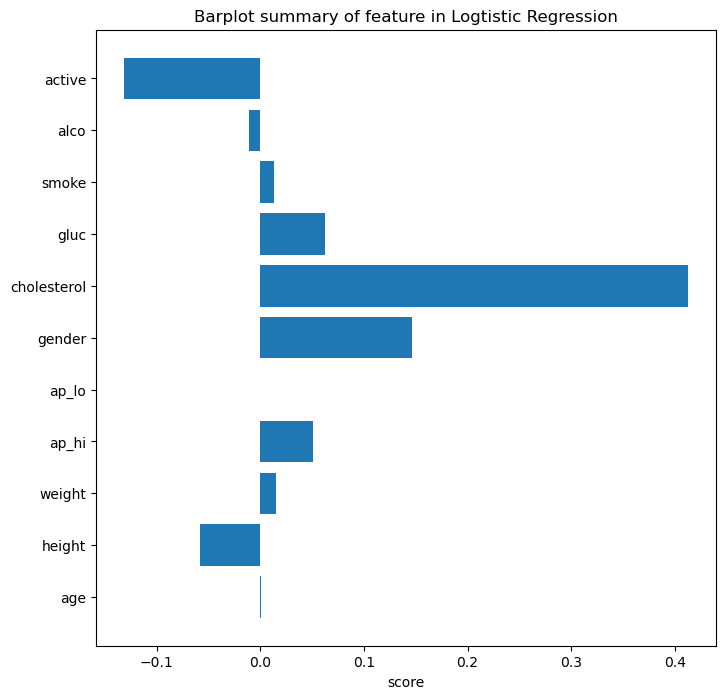

In [24]:
#getting feature importance
log_importance=logfit.coef_.flatten()
#barplot of features
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(8,8)
plt.barh(x_test.columns,log_importance)
plt.title("Barplot summary of feature in Logtistic Regression")
plt.xlabel("score")
plt.show()

# 3 Build the Gradient Boosting Model

In [25]:
param_grid = {'learning_rate': [0.1, 0.05], 'n_estimators': [100, 1000]}

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
numeric_tx = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])
cat_tx = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [27]:
preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_tx, num_vars),
    ('binary', cat_tx, bin_vars),
    ('3cat', cat_tx, cat3_vars)
])

In [28]:
gbm = GradientBoostingClassifier()
gbmsearch = GridSearchCV(gbm, param_grid, scoring='roc_auc')

In [29]:
gbmpipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', gbmsearch)])
gbmfit = gbmpipe.fit(x_train, y_train)
gbmpreds = gbmfit.predict_proba(x_test)

C:\Users\zihui\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\zihui\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

In [30]:
pd.DataFrame(gbmsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.638906,0.138733,0.018726,0.006252,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.805667,0.797497,0.801790,0.801064,0.796293,0.800462,0.003328,1
1,46.655091,0.673911,0.101431,0.007013,0.1,1000,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.800871,0.794032,0.797463,0.797270,0.792626,0.796452,0.002888,4
2,4.959707,0.289416,0.028125,0.011671,0.05,100,"{'learning_rate': 0.05, 'n_estimators': 100}",0.804794,0.796817,0.800477,0.799542,0.795324,0.799391,0.003273,2
3,47.227091,2.038362,0.112479,0.006258,0.05,1000,"{'learning_rate': 0.05, 'n_estimators': 1000}",0.803257,0.796169,0.800835,0.799958,0.795040,0.799052,0.003036,3


From the results, when the hyperparameters as learning rate=0.1, n_estimators=100 of Gradient Boosting Regression model, we can get better GBM model as shown above.

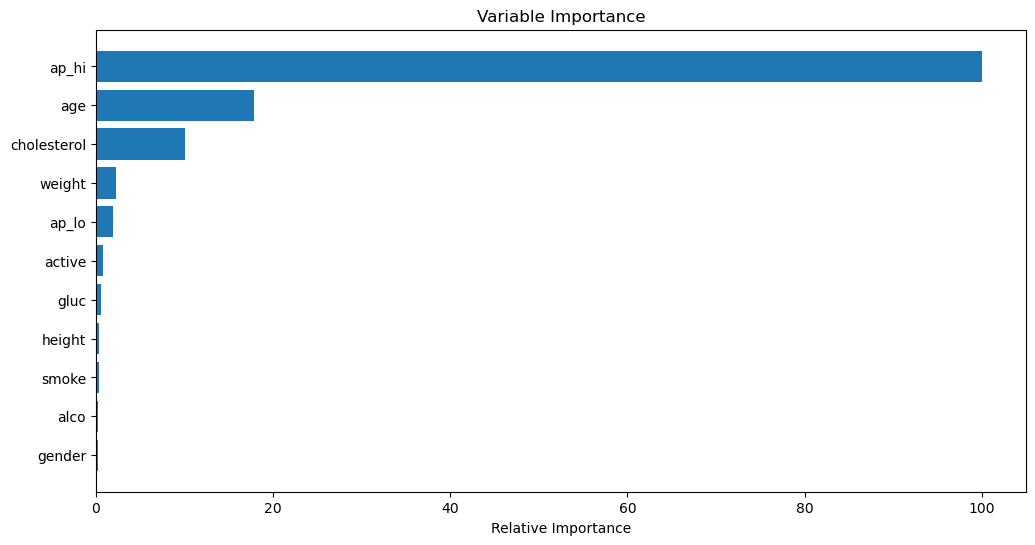

In [31]:
import numpy as np
gbmbestfit=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100).fit(x_train, y_train)
gbm_importance=gbmbestfit.feature_importances_
gbm_importance = 100.0 * (gbm_importance / gbm_importance.max())
sorted_idx = np.argsort(gbm_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, gbm_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [32]:
gbm_pred=gbmbestfit.predict_proba(x_test)
roc_auc_score(y_test, gbm_pred[:,1])

0.8007335295696983

In [33]:
# Compare AUC Score of Logistic Regression and Gradient Boosting Classifier
Model_list=[log_reg,gbm]

0.7702861534063976


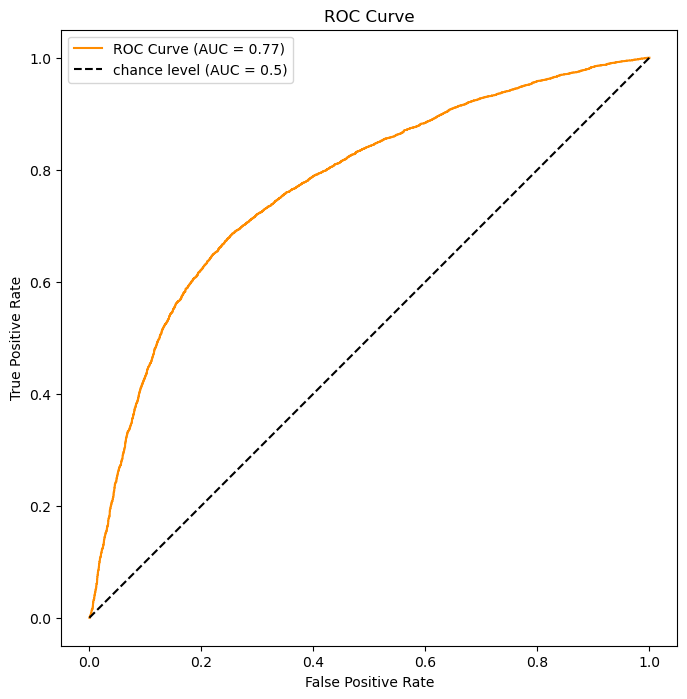

0.8007338753631885


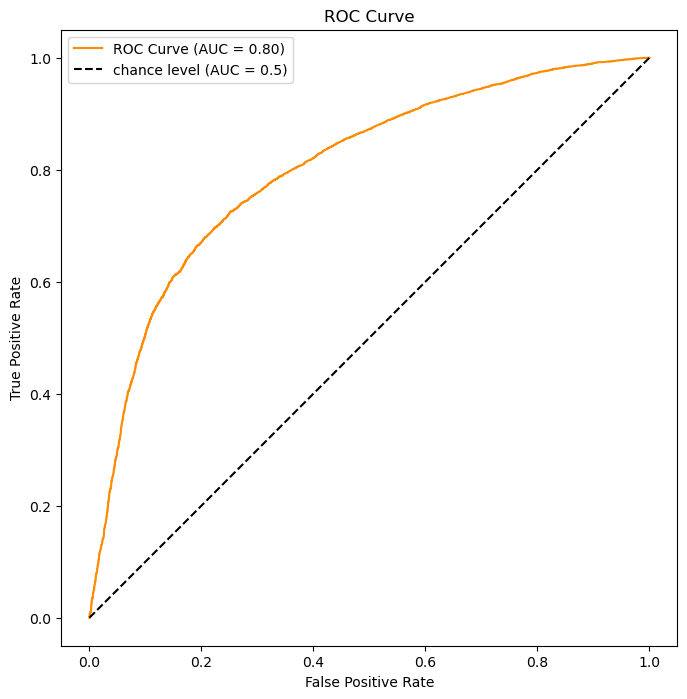

In [37]:
for model in Model_list:
    pipeline=Pipeline([('Classifier',model)])
    model_pipeline=pipeline.fit(x_train,y_train)
    preds=model_pipeline.predict_proba(x_test)
    print(roc_auc_score(y_test, preds[:,1]))
    RocCurveDisplay.from_predictions(
    y_test,
    preds[:,1],
    name='ROC Curve',color="darkorange")
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

# 4. Build model by Deep Neural Network

In [37]:
import math
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [38]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_xdataset= sc.fit_transform(x_train)
test_xdataset= sc.fit_transform(x_test)

In [42]:
class CardioDataset(Dataset):
    def __init__(self, x,y):
        # data loading
        self.x = torch.tensor(x,dtype=torch.float32)
        self.y = torch.tensor(y.values,dtype=torch.float32).view([-1,1])
        self.n_samples = self.x.shape[0]
    def __getitem__(self, index):
        # dataset[0]
        return self.x[index], self.y[index]
    def __len__(self):
        # len(dataset)
        return self.n_samples

In [43]:
ds_train = CardioDataset(train_xdataset,y_train)
ds_test = CardioDataset(test_xdataset,y_test)
train_dataloader = DataLoader(dataset=ds_train, batch_size=4, shuffle=True)
test_dataloader = DataLoader(dataset=ds_test, batch_size=4, shuffle=False)     

In [44]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([4, 11])
Shape of y: torch.Size([4, 1]) torch.float32


In [45]:
# Build Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # There're 11 features based on the description of the dataset
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(11, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        logitnn = self.linear_relu_stack(x)
        return logitnn
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=11, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [68]:
model=NeuralNetwork()
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [53]:
model=NeuralNetwork()
loss_fn = nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [69]:
# Define Training and Testing procedure
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 5000 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    print(f"Avg loss: {test_loss:>8f} \n")

In [70]:
# Training Deep Neural Network
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.684474  [    4/54432]
loss: 0.314890  [20004/54432]
loss: 0.260804  [40004/54432]
Avg loss: 0.548425 

Epoch 2
-------------------------------
loss: 0.917790  [    4/54432]
loss: 0.533014  [20004/54432]
loss: 0.495595  [40004/54432]
Avg loss: 0.544509 

Epoch 3
-------------------------------
loss: 0.671329  [    4/54432]
loss: 0.460123  [20004/54432]
loss: 0.547325  [40004/54432]
Avg loss: 0.550433 

Epoch 4
-------------------------------
loss: 0.359573  [    4/54432]
loss: 0.484390  [20004/54432]
loss: 0.243321  [40004/54432]
Avg loss: 0.543188 

Epoch 5
-------------------------------
loss: 0.501697  [    4/54432]
loss: 0.607764  [20004/54432]
loss: 0.448442  [40004/54432]
Avg loss: 0.542737 

Epoch 6
-------------------------------
loss: 0.283888  [    4/54432]
loss: 0.585085  [20004/54432]
loss: 0.271257  [40004/54432]
Avg loss: 0.544238 

Epoch 7
-------------------------------
loss: 0.404451  [    4/54432]
loss: 1.156149  [20004/5

In [71]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [72]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [74]:
test_torchx=torch.tensor(test_xdataset,dtype=torch.float32)
y_pred = model(test_torchx)
y_pred = y_pred.detach().numpy()
roc_auc_score(y_test, y_pred)

0.7980988209068732

# Summary for models

Based on the ROC Score, the performance of GBM (Gradient Boosting Classifier) is the best, with highest AUC/ ROC score: 80%, among Logistics Classifier, GBM, and neural network. This GBM module for predicting Cardio vascular disease can benefit the medical industry. The benefits can be summarized as below,

1. The GBM model can predict whether the patients have Cardio vascular Disease or not based on some simple inputs: Age, Height, Weight, Gender, Blood Pressures, Cholesterol, Glucose, Smoking Alcohol Intake and Physical activity in a high accuracy rate, around 80% accuracy. Doctors can collect simple inputs collected from survey and lab tests to roughly measure whether the patients needs more expensive further investigation/ referral to specialists to detect Cardio vascular disease. The model application can benefit patients and insurance company saving cost from more expensive further investigation and detecting cardio disease by simple survey and lab tests as first step.

2. As mentioned in 1st point, the prediction model can reduce doctors' workload and increase doctors' efficiency of cardio vascular disease possibility measurment on patients.

3. The GBM Model can provide guidance to patients which vital signs should be traced for identify whether they have higher possibility of having Cardio Vascular Disease. For exmaple, if blood pressure (Systolic) and cholesterol are high, then the patients need to pay attention to observe themselves whether they have higher possibility of having Cardio Vascular Disease and follow up to visit their doctors if they find any indication of Cardio Vascular Disease based on the vital signs.

4. This GBM Model provides the feature importance graph. The feature importance informaton can provide which factors doctors and medical research institutes need to be concerned on. The medical industry can determine the further investigation on cardio disease research and study area by the feature importance information as reference.